# Import Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import os
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Loading and EDA of Data

In [24]:
#Load and print dataset
df = pd.read_csv('Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv')
df.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


In [25]:
# Convert 'Opened' and 'Closed' columns to datetime format
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])

In [26]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45712 entries, 0 to 45711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Company      45712 non-null  object        
 1   File No.     45712 non-null  int64         
 2   Opened       45712 non-null  datetime64[ns]
 3   Closed       44466 non-null  datetime64[ns]
 4   Coverage     43010 non-null  object        
 5   SubCoverage  35616 non-null  object        
 6   Reason       42903 non-null  object        
 7   SubReason    42903 non-null  object        
 8   Disposition  27322 non-null  object        
 9   Conclusion   26218 non-null  object        
 10  Recovery     45712 non-null  float64       
 11  Status       45712 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 4.2+ MB


In [27]:
df.shape

(45712, 12)

In [28]:
df.isnull().sum()

Company            0
File No.           0
Opened             0
Closed          1246
Coverage        2702
SubCoverage    10096
Reason          2809
SubReason       2809
Disposition    18390
Conclusion     19494
Recovery           0
Status             0
dtype: int64

In [29]:
df = df.dropna()
df.isnull().sum()

Company        0
File No.       0
Opened         0
Closed         0
Coverage       0
SubCoverage    0
Reason         0
SubReason      0
Disposition    0
Conclusion     0
Recovery       0
Status         0
dtype: int64

In [30]:
# Display summary statistics
df.describe()

,File No.,Recovery
count,1.223700e+04,12237.000000
mean,7.048659e+06,2374.919341
std,1.075679e+04,18768.512770
min,7.000149e+06,0.000000
25%,7.045475e+06,0.000000
50%,7.050463e+06,0.000000
75%,7.055306e+06,262.620000
max,7.060228e+06,506140.410000


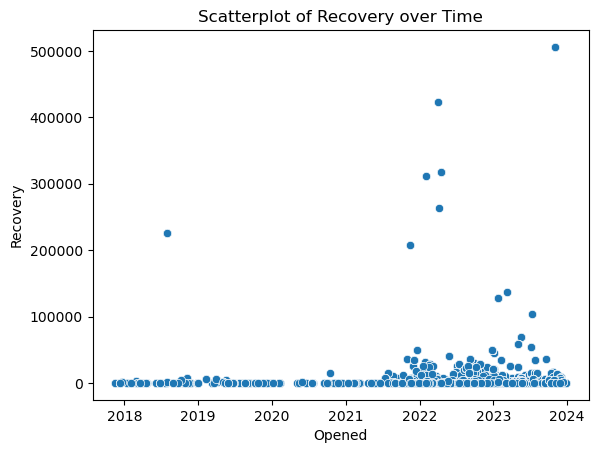

In [31]:
# Scatterplot for 'Opened' and 'Recovery'
sns.scatterplot(x='Opened', y='Recovery', data=df)
plt.title('Scatterplot of Recovery over Time')
plt.show()

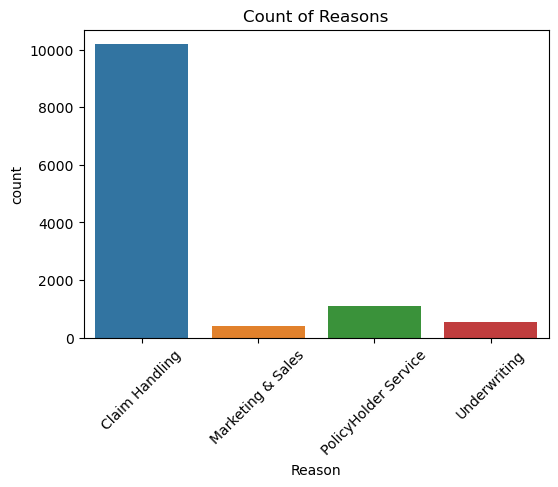

In [32]:
# Countplot for 'Reason'
plt.figure(figsize=(6, 4))
sns.countplot(x='Reason', data=df)
plt.title('Count of Reasons')
plt.xticks(rotation=45)
plt.show()


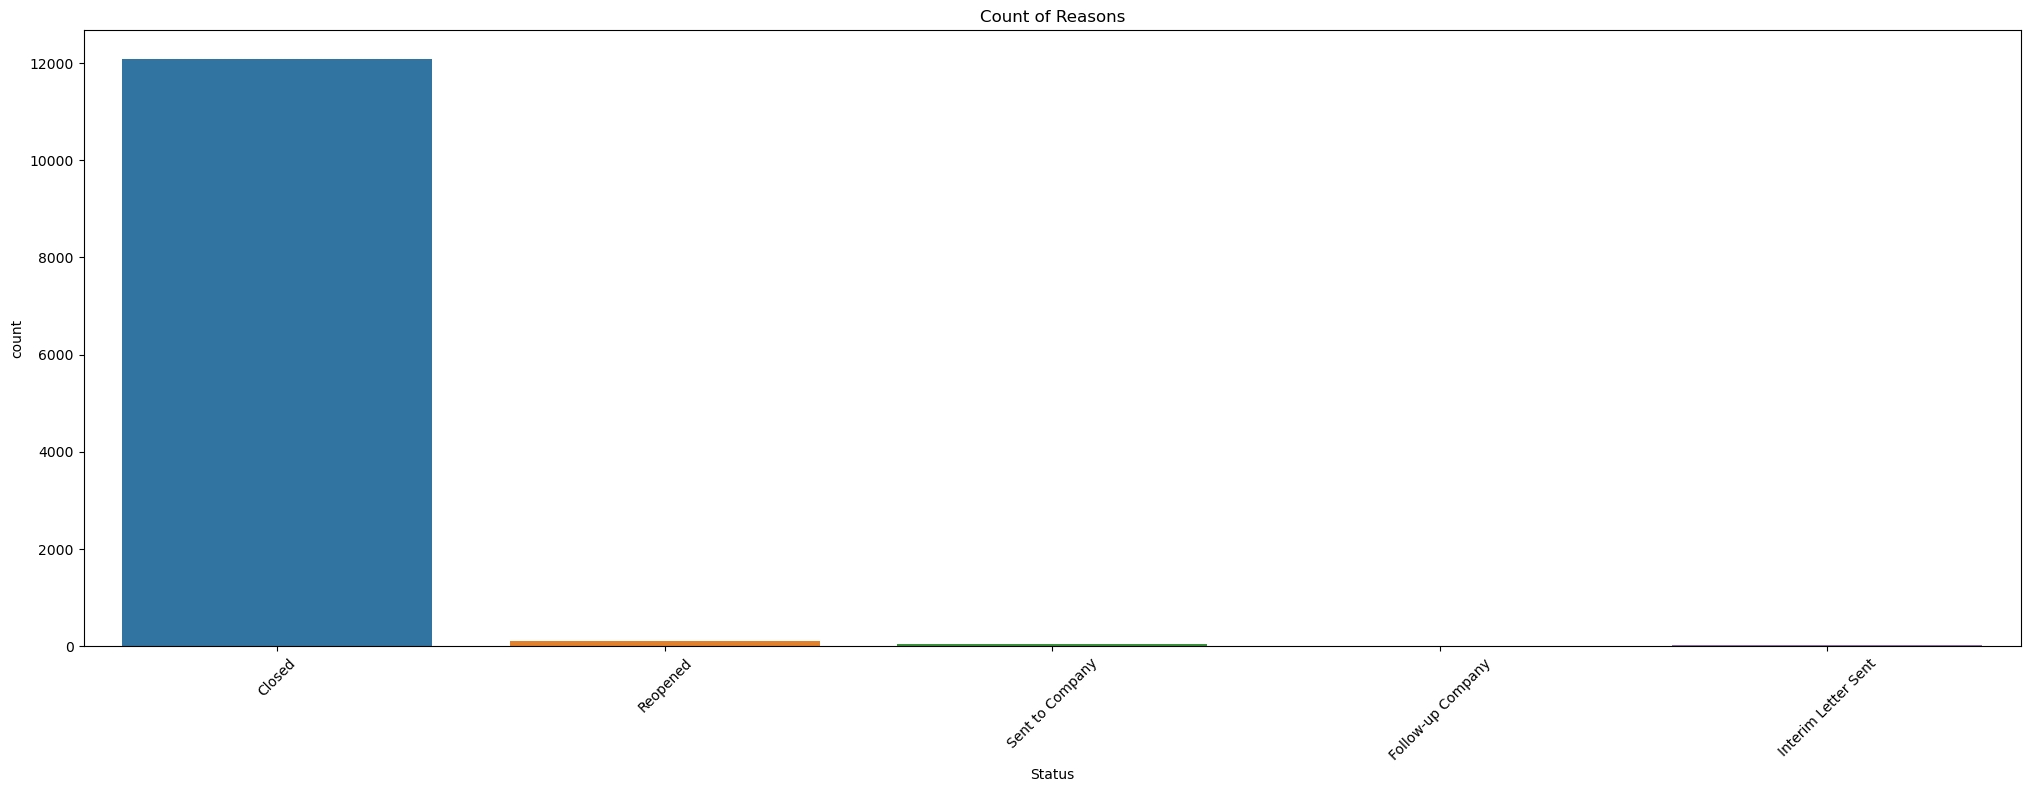

In [33]:
# Countplot for 'Reason'
plt.figure(figsize=(25, 8))
sns.countplot(x='Status', data=df)
plt.title('Count of Reasons')
plt.xticks(rotation=45)
plt.show()

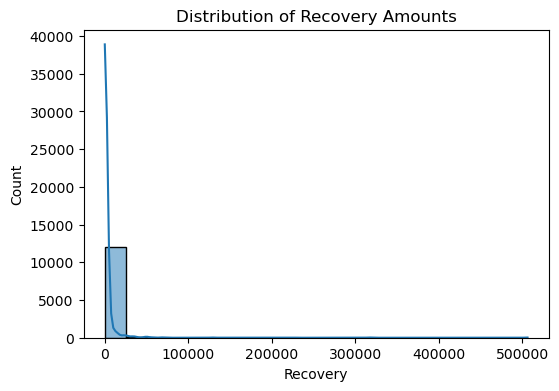

In [34]:
# Histogram for 'Recovery'
plt.figure(figsize=(6, 4))
sns.histplot(df['Recovery'], bins=20, kde=True)
plt.title('Distribution of Recovery Amounts')
plt.show()


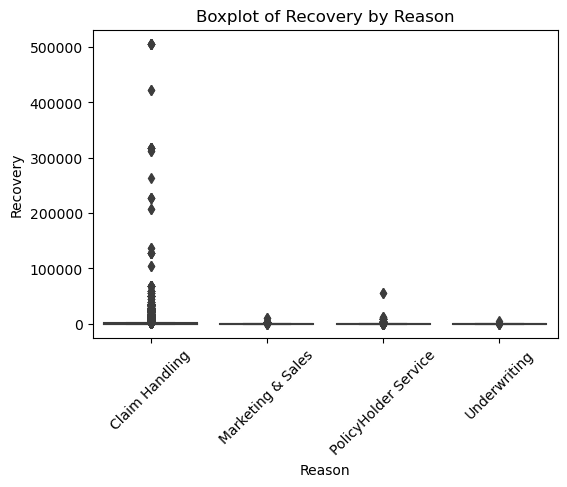

In [35]:
# Boxplot for 'Reason' and 'Recovery'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Reason', y='Recovery', data=df)
plt.title('Boxplot of Recovery by Reason')
plt.xticks(rotation=45)
plt.show()

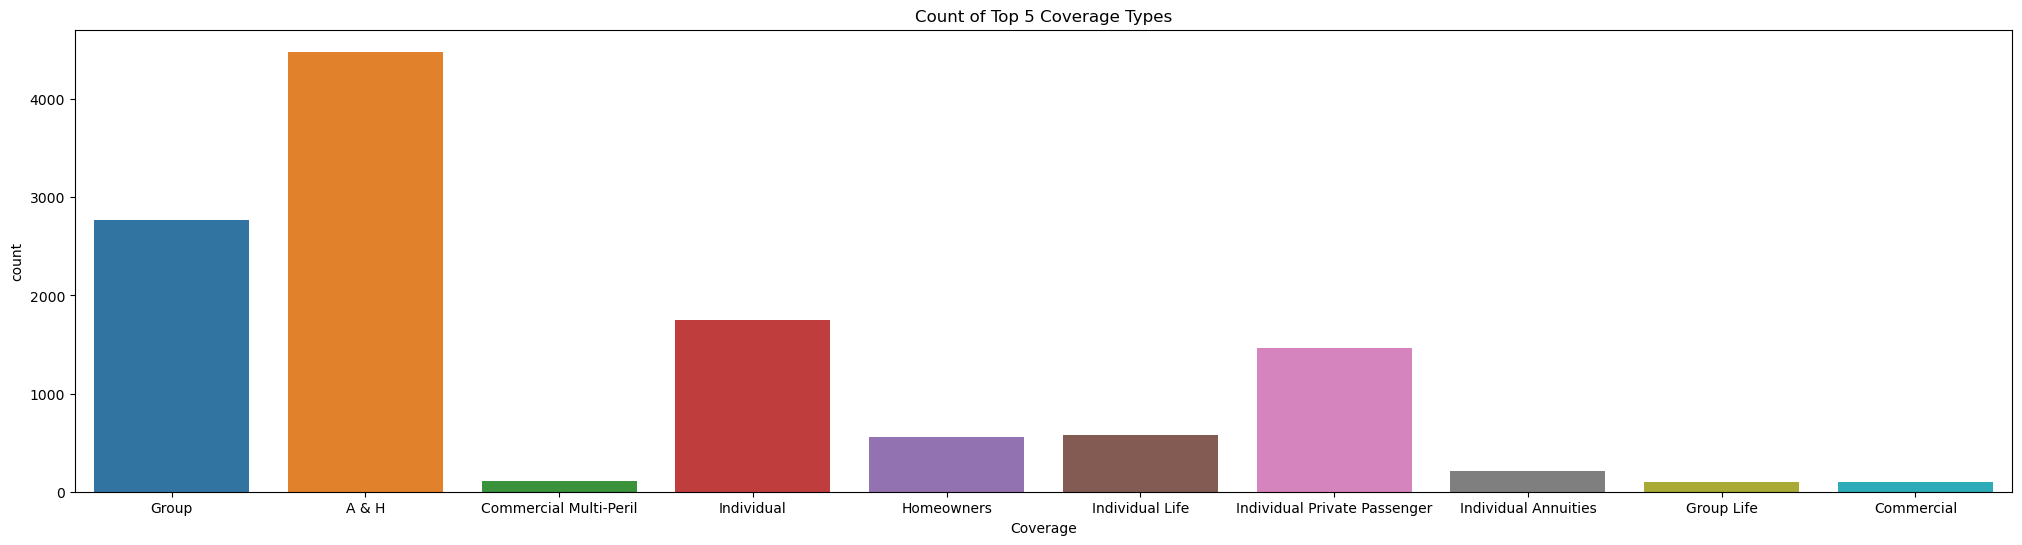

In [36]:
# Countplot for top 5 'Coverage'
plt.figure(figsize=(25, 6))
top5_coverage = df['Coverage'].value_counts().nlargest(10)
sns.countplot(x='Coverage', data=df[df['Coverage'].isin(top5_coverage.index)])
plt.title('Count of Top 5 Coverage Types')
plt.show()

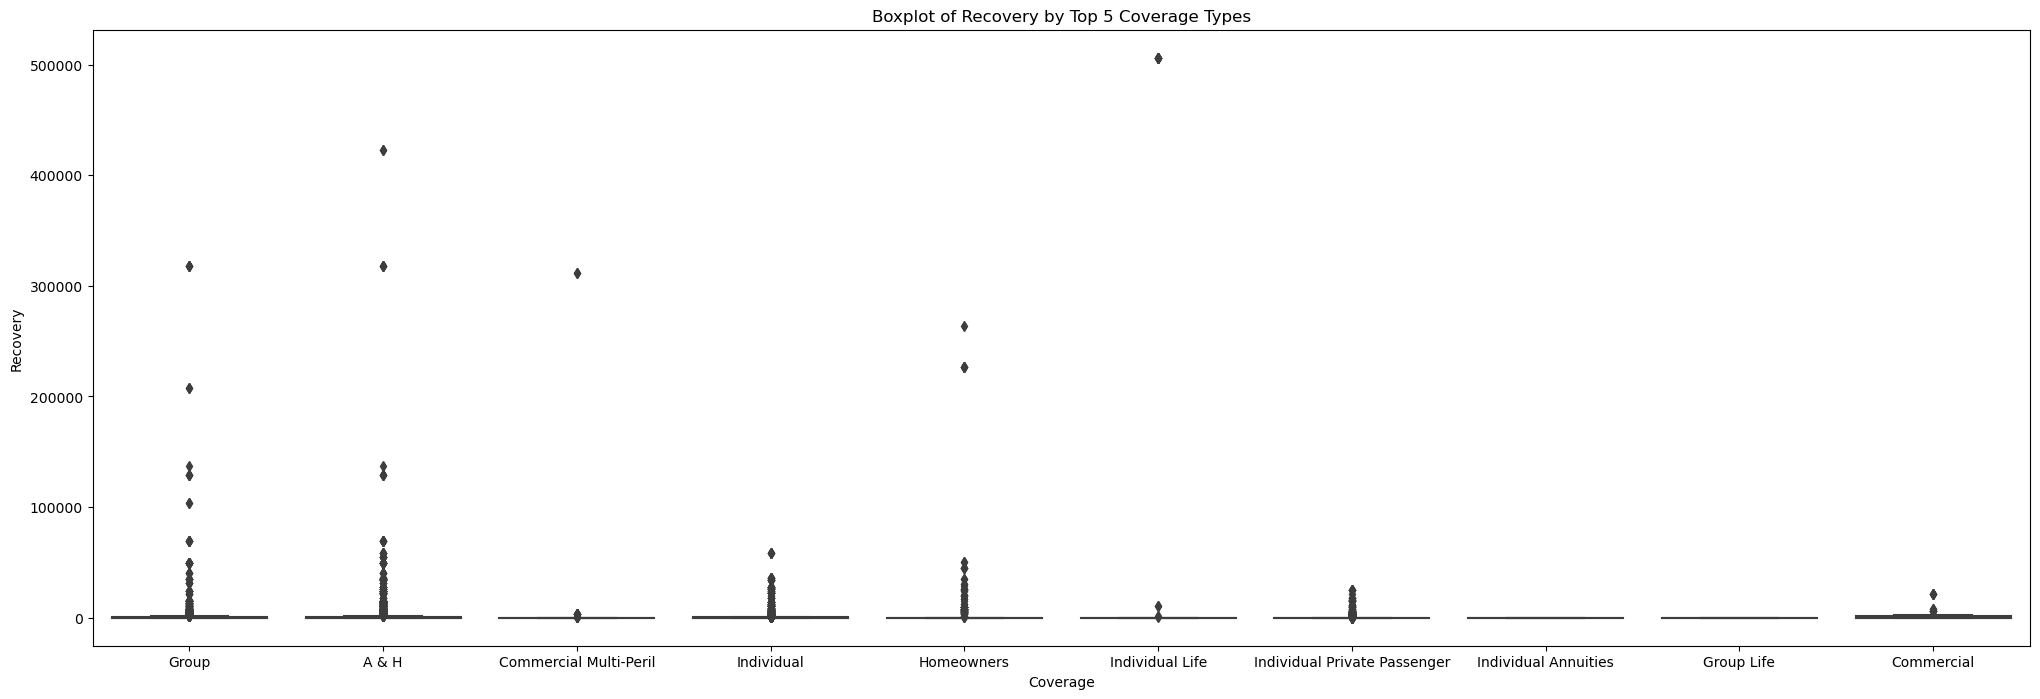

In [37]:
# Boxplot for top 5 'Recovery' by 'Coverage'
plt.figure(figsize=(25, 8))
top5_coverage = df['Coverage'].value_counts().nlargest(10).index
sns.boxplot(x='Coverage', y='Recovery', data=df[df['Coverage'].isin(top5_coverage)])
plt.title('Boxplot of Recovery by Top 5 Coverage Types')
plt.show()

In [38]:
df.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,2022-05-31,2022-06-02,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,2022-02-28,2022-06-02,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,2022-05-03,2022-06-02,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,2022-02-28,2022-06-02,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,2023-02-23,2023-03-17,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


# Preprocessing of Data

In [39]:
df = df.drop(['File No.','Opened','Closed'], axis = 1)

In [40]:
df.head()

,Company,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


In [41]:
# Create a dictionary to store the encoders
encoders = {}

# Specify the folder path
folder_path = "encoder files"

# Check if the folder exists, create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns and save each encoder
categorical_columns = ['Company', 'Coverage', 'SubCoverage', 'SubReason', 'Disposition', 'Conclusion', 'Status']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

    # Save each encoder to a file in the "encoder_files" folder
    encoder_filename = os.path.join(folder_path, f"{col}_encoder.joblib")
    joblib.dump(label_encoder, encoder_filename)
    print(f"Encoder for {col} saved to {encoder_filename}")

Encoder for Company saved to encoder files\Company_encoder.joblib
Encoder for Coverage saved to encoder files\Coverage_encoder.joblib
Encoder for SubCoverage saved to encoder files\SubCoverage_encoder.joblib
Encoder for SubReason saved to encoder files\SubReason_encoder.joblib
Encoder for Disposition saved to encoder files\Disposition_encoder.joblib
Encoder for Conclusion saved to encoder files\Conclusion_encoder.joblib
Encoder for Status saved to encoder files\Status_encoder.joblib


In [42]:
df.head()

,Company,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,41,10,28,Claim Handling,74,3,7,0.00,0
1,41,10,28,Claim Handling,115,1,43,6467.30,0
2,41,0,28,Claim Handling,41,1,4,147.58,0
3,41,10,0,Claim Handling,115,1,43,6467.30,0
4,41,0,0,Marketing & Sales,45,5,34,2179.32,0


# Models and Evaluation

In [43]:
# Split the data into features (X) and target variable (y)
X = df.drop('Reason', axis=1)
y = df['Reason']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Model 2: Decision Tree Classifier
dt_classifier_model = DecisionTreeClassifier(random_state=2)
dt_classifier_model.fit(X_train, y_train)
dt_classifier_predictions = dt_classifier_model.predict(X_test)

# Model 3: Random Forest Classifier
rf_classifier_model = RandomForestClassifier(random_state=2)
rf_classifier_model.fit(X_train, y_train)
rf_classifier_predictions = rf_classifier_model.predict(X_test)

# Evaluate the models
models_classifier = [logistic_model, dt_classifier_model, rf_classifier_model]
predictions_classifier = [logistic_predictions, dt_classifier_predictions, rf_classifier_predictions]

for i, model in enumerate(models_classifier):
    accuracy = accuracy_score(y_test, predictions_classifier[i])
    report = classification_report(y_test, predictions_classifier[i])

    print(f'Model {i + 1} - {type(model).__name__}:')
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:\n', report)
    print('-' * 30)


Model 1 - LogisticRegression:
Accuracy: 0.83
Classification Report:
                       precision    recall  f1-score   support

      Claim Handling       0.83      1.00      0.90      2029
   Marketing & Sales       0.00      0.00      0.00        91
PolicyHolder Service       0.00      0.00      0.00       237
        Underwriting       0.00      0.00      0.00        91

            accuracy                           0.83      2448
           macro avg       0.21      0.25      0.23      2448
        weighted avg       0.69      0.83      0.75      2448

------------------------------
Model 2 - DecisionTreeClassifier:
Accuracy: 0.99
Classification Report:
                       precision    recall  f1-score   support

      Claim Handling       1.00      1.00      1.00      2029
   Marketing & Sales       0.97      0.97      0.97        91
PolicyHolder Service       0.99      0.98      0.99       237
        Underwriting       0.96      0.97      0.96        91

            accu

Model 1 - LogisticRegression


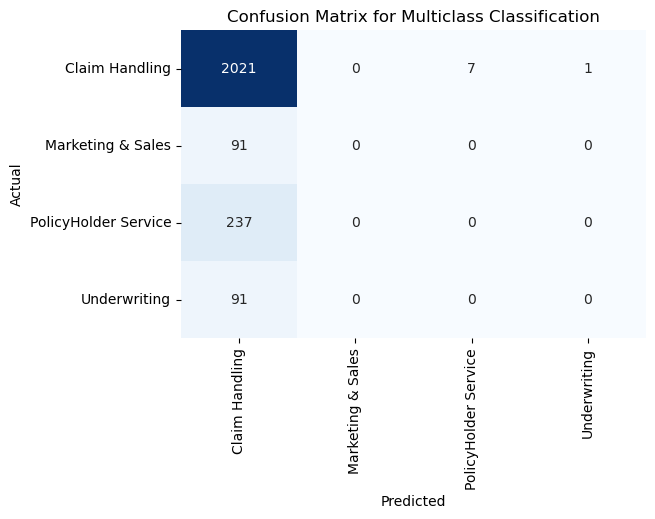

Model 2 - DecisionTreeClassifier


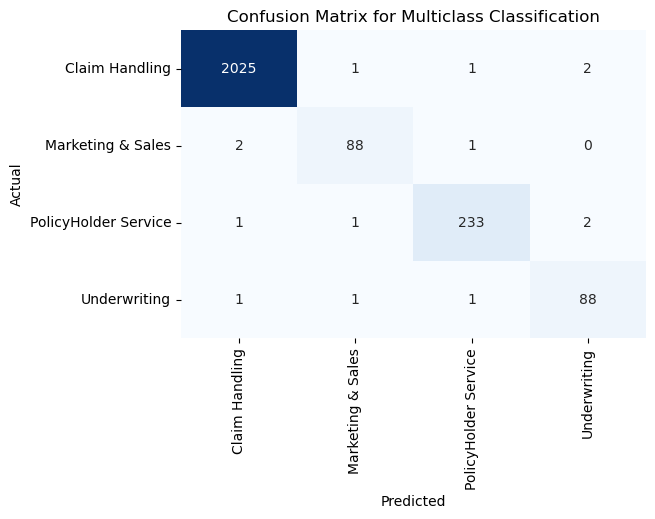

Model 3 - RandomForestClassifier


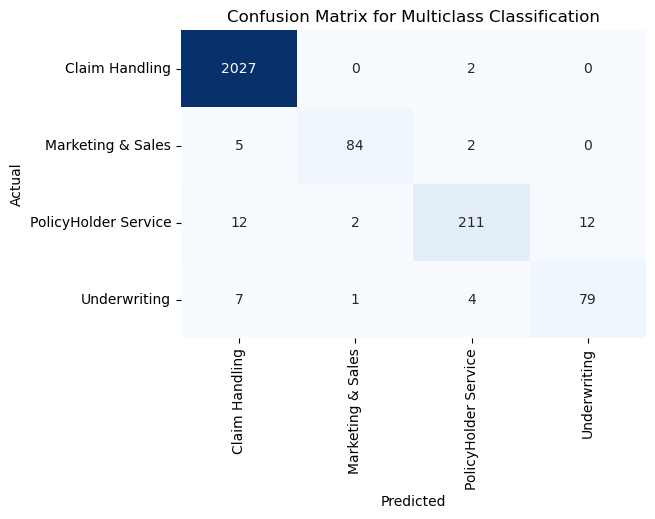

In [44]:
# Function to plot confusion matrix
def plot_confusion_matrix_multiclass(model, X_test, y_test, class_labels):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix for Multiclass Classification')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define your class labels (replace 'YourClassLabels' with the actual class labels)
class_labels = ['Claim Handling', 'Marketing & Sales', 'PolicyHolder Service', 'Underwriting']

# Plot confusion matrix for each model
for i, model in enumerate(models_classifier):
    print(f"Model {i + 1} - {type(model).__name__}")
    plot_confusion_matrix_multiclass(model, X_test, y_test, class_labels)

Model 1 - LogisticRegression


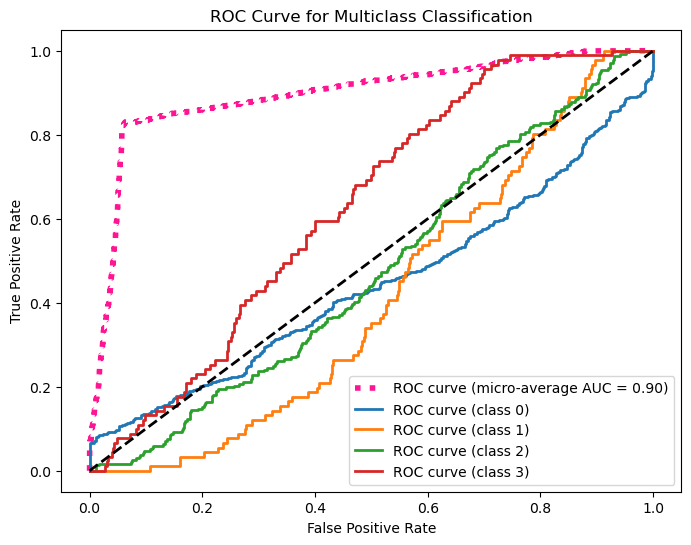

Model 2 - DecisionTreeClassifier


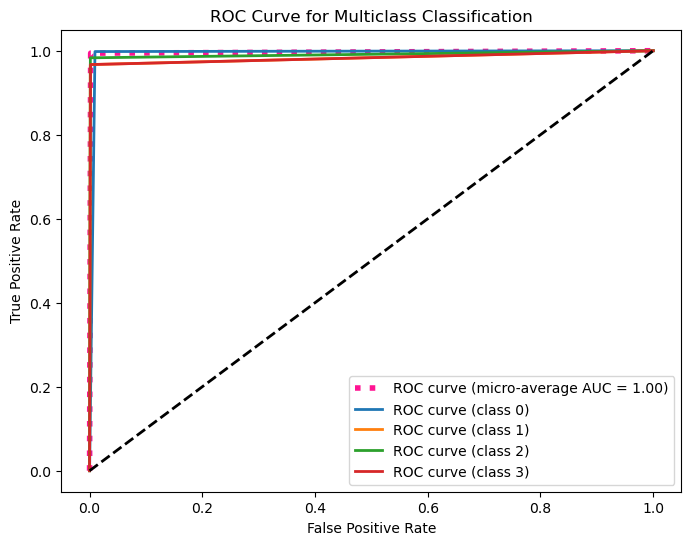

Model 3 - RandomForestClassifier


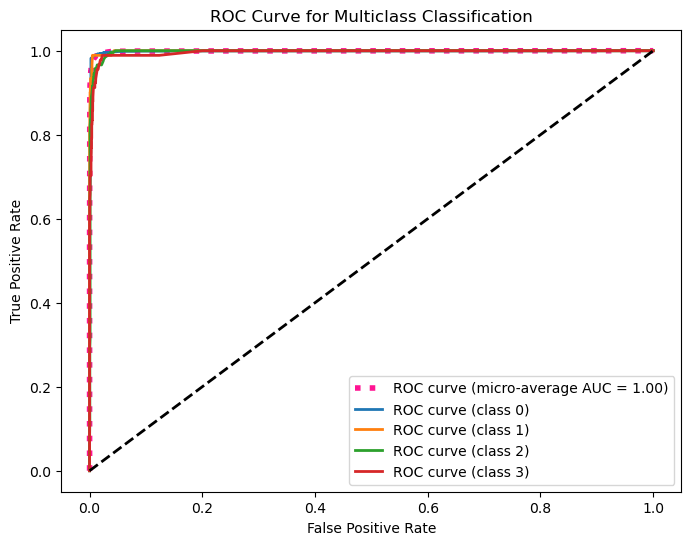

In [45]:
# Function to plot ROC curve with AUC value for multiclass
def plot_roc_curve_multiclass(model, X_test, y_test):
    n_classes = len(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test).ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot micro-average ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (micro-average AUC = {:.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (class {})'.format(i), linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each model
for i, model in enumerate(models_classifier):
    print(f"Model {i + 1} - {type(model).__name__}")
    plot_roc_curve_multiclass(model, X_test, y_test)

In [46]:
# Save the Random Forest model
model_filename = "random_forest_model.joblib"
joblib.dump(rf_classifier_model, model_filename)
print(f"Random Forest Classifier saved to {model_filename}")

Random Forest Classifier saved to random_forest_model.joblib
